# DEFINING DATASET

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
URL_DATA = 'https://storage.data.gov.my/demography/births.parquet'

df = pd.read_parquet(URL_DATA)

In [3]:
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])
df = df.drop('state', axis=1 )
df = df.rename(columns={'date': 'birthdate'})

In [4]:
print(df)

       birthdate  births
0     1920-01-01      96
1     1920-01-02     115
2     1920-01-03     111
3     1920-01-04     101
4     1920-01-05      95
...          ...     ...
37828 2023-07-27    1199
37829 2023-07-28    1220
37830 2023-07-29     927
37831 2023-07-30     938
37832 2023-07-31    1098

[37833 rows x 2 columns]


In [5]:
df['year'] = df['birthdate'].dt.year
df['month'] = df['birthdate'].dt.month
df['date'] = df['birthdate'].dt.day

df = df[['birthdate', 'year', 'month', 'date', 'births']]
print(df)

       birthdate  year  month  date  births
0     1920-01-01  1920      1     1      96
1     1920-01-02  1920      1     2     115
2     1920-01-03  1920      1     3     111
3     1920-01-04  1920      1     4     101
4     1920-01-05  1920      1     5      95
...          ...   ...    ...   ...     ...
37828 2023-07-27  2023      7    27    1199
37829 2023-07-28  2023      7    28    1220
37830 2023-07-29  2023      7    29     927
37831 2023-07-30  2023      7    30     938
37832 2023-07-31  2023      7    31    1098

[37833 rows x 5 columns]


# Define the birth year ranges for each generation

In [47]:
generation_ranges = {
    'all' : ('ALL', 1920, 2025),
    'older' : ('Older Generation (1920 - 1980)', 1920, 1980),
    'younger' : ('Younger Generation (1981 - 2022)', 1981, 2022),
    'silent': ('Silent Generation (1928 - 1945)', 1928, 1945), #17
    'boomer': ('Baby Boomer (1946 - 1964)', 1946, 1964), #18
    'genX': ('Gen X (1965 - 1980)', 1965, 1980), #15
    'genY': ('Millennials (1981 - 1996)', 1981, 1996), #15
    'genZ': ('Gen Z (1997 - 2009)', 1997, 2009), #12
    'genAlpha': ('Gen Alpha (2010 - 2022)', 2010, 2022)
}

# Create an empty dictionary to store subsets of DataFrame for each generation
gen = {}

# Loop through the generation ranges
for generation, (name, start_year, end_year) in generation_ranges.items():
    # Filter the DataFrame for the current generation
    gen_df = df[(df['birthdate'].dt.year >= start_year) & (df['birthdate'].dt.year <= end_year)]
    
    # Store the subset DataFrame in the generations dictionary
    gen[generation] = gen_df

In [145]:
gen['all']

,birthdate,year,month,date,births
0,1920-01-01,1920,1,1,96
1,1920-01-02,1920,1,2,115
2,1920-01-03,1920,1,3,111
3,1920-01-04,1920,1,4,101
4,1920-01-05,1920,1,5,95
...,...,...,...,...,...
37828,2023-07-27,2023,7,27,1199
37829,2023-07-28,2023,7,28,1220
37830,2023-07-29,2023,7,29,927
37831,2023-07-30,2023,7,30,938


# METHODS

In [187]:
#Creating birthday heatmap
def generate_heatmap(genName):
    
    # Generate pivot table for the specified generation
    pivot_table = gen[genName].pivot_table(index='month', columns='date', values='births', aggfunc='sum')
    
    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, cmap='BuPu', annot=False, robust=True)
    plt.title(f'Heatmap of Birthdates for {generation_ranges[genName][0]}')
    plt.xlabel('Date')
    plt.ylabel('Month')
    plt.show()

In [157]:
# popular birthday
def common_birthday(genName, N):
    top_N = gen[genName].sort_values(by='births', ascending=False).head(N)
    return top_N

In [158]:
# popular birthdates
def common_birthdates(genName, N):
    gp = gen[genName].drop(['birthdate', 'year'], axis=1 )
    gp = gp.groupby(['month', 'date'])['births'].sum()
    top_N = gp.sort_values(ascending=False).head(N)
    
    top_N = top_N.reset_index()
    top_N.columns = ['month', 'date', 'births']
    return top_N

In [159]:
# rarest birthday
def rarest_birthday(genName, N):
    rare_N = gen[genName].sort_values(by='births', ascending=True).head(N)
    return rare_N

In [160]:
# rarest birthdates
def rarest_birthdates(genName, N):
    gp = gen[genName].drop(['birthdate', 'year'], axis=1 )
    gp = gp.groupby(['month', 'date'])['births'].sum()
    top_N = gp.sort_values(ascending=True).head(N)
    
    top_N = top_N.reset_index()
    top_N.columns = ['month', 'date', 'births']
    return top_N

# MOST POPULAR AND RAREST BIRTHDAY IN EACH GENERATION

In [161]:
generation_summary = pd.DataFrame(columns=['Generation', 'Most Popular', 'Rarest'])

for i in gen:
    most_popular = common_birthday(i, 1)['birthdate'].dt.date.tolist()
    rarest = rarest_birthday(i, 1)['birthdate'].dt.date.tolist()
    
    generation_summary.loc[len(generation_summary)] = [generation_ranges[i][0], most_popular, rarest]

generation_summary

,Generation,Most Popular,Rarest
0,ALL,[1936-12-31],[1922-12-25]
1,Older Generation (1920 - 1980),[1936-12-31],[1922-12-25]
2,Younger Generation (1981 - 2022),[1986-01-01],[2022-05-02]
3,Silent Generation (1928 - 1945),[1936-12-31],[1928-12-25]
4,Baby Boomer (1946 - 1964),[1949-12-31],[1946-02-23]
5,Gen X (1965 - 1980),[1969-01-01],[1967-12-22]
6,Millennials (1981 - 1996),[1986-01-01],[1983-12-26]
7,Gen Z (1997 - 2009),[2008-08-08],[2003-02-02]
8,Gen Alpha (2010 - 2022),[2011-11-11],[2022-05-02]


# Birthdate HeatMap

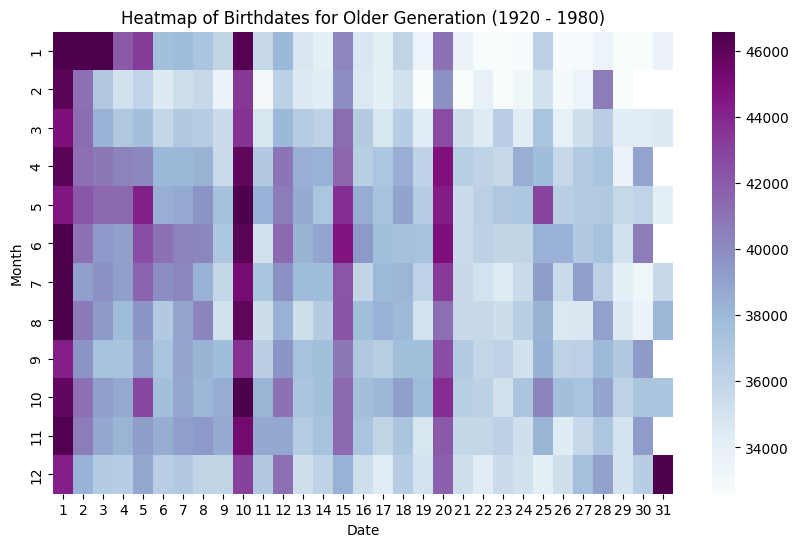

In [188]:
generate_heatmap('older')

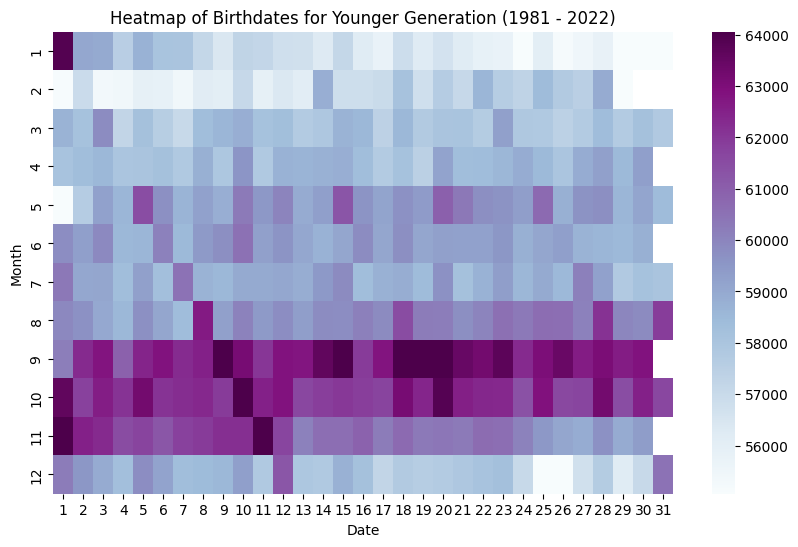

In [189]:
generate_heatmap('younger')

# POPULAR BIRTHDAYS

In [164]:
commonDates = common_birthdates('younger', 5)
commonBirthday = common_birthday('younger', 5) #including year

rareDate = rarest_birthdates('younger', 5)
rareBirthday = rarest_birthday('younger', 5) #including year


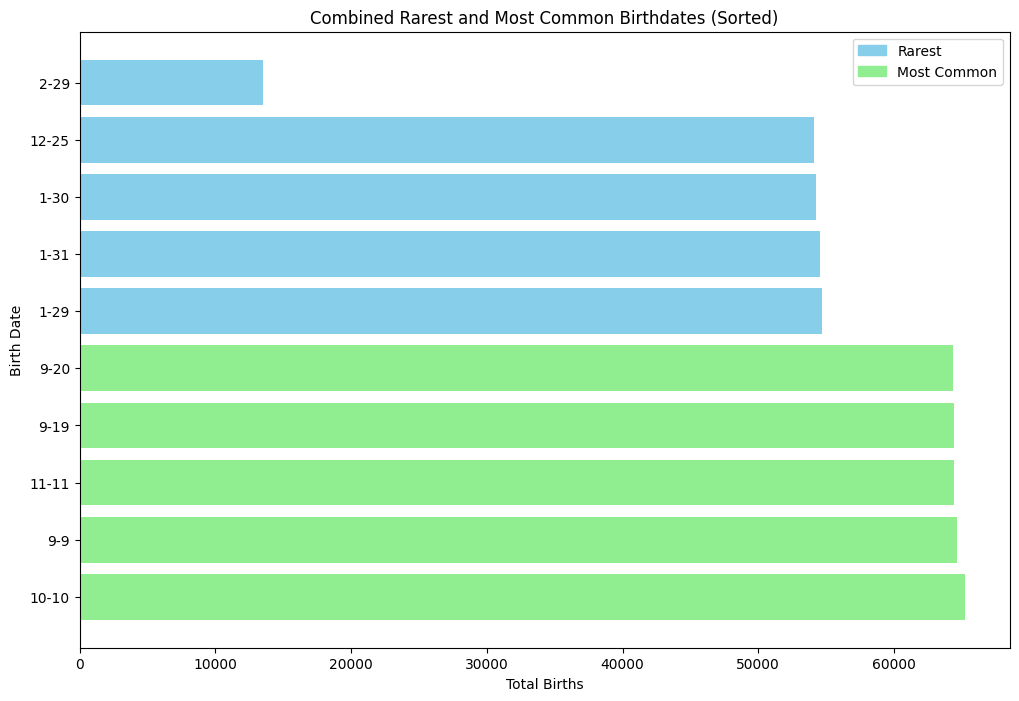

In [183]:
birthdates = pd.concat([commonDates, rareDate], ignore_index=True).sort_values(by='births', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(birthdates['month'].astype(str) + '-' + birthdates['date'].astype(str), birthdates['births'], color=['lightgreen']*len(rareDate) + ['skyblue']*len(commonDates))
plt.title('Combined Rarest and Most Common Birthdates (Sorted)')
plt.xlabel('Total Births')
plt.ylabel('Birth Date')

# Create a legend
legend_colors = {'Rarest': 'skyblue', 'Most Common': 'lightgreen'}
legend_labels = list(legend_colors.keys())
legend_handles = [plt.Rectangle((0,0),1,1, color=legend_colors[label]) for label in legend_labels]
plt.legend(legend_handles, legend_labels)

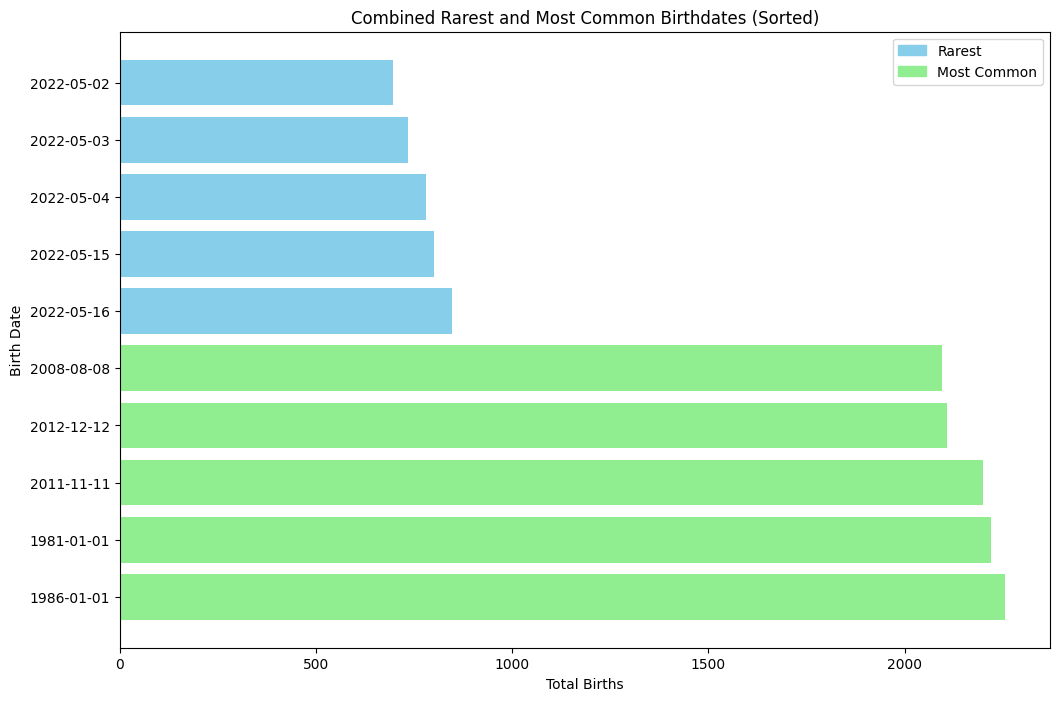

In [186]:
birthdatesYear = pd.concat([commonBirthday, rareBirthday], ignore_index=True).sort_values(by='births', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(birthdatesYear['birthdate'].astype(str), birthdatesYear['births'], color=['lightgreen']*len(rareBirthday) + ['skyblue']*len(commonBirthday))
plt.title('Combined Rarest and Most Common Birthdates (Sorted)')
plt.xlabel('Total Births')
plt.ylabel('Birth Date')

# Create a legend
legend_colors = {'Rarest': 'skyblue', 'Most Common': 'lightgreen'}
legend_labels = list(legend_colors.keys())
legend_handles = [plt.Rectangle((0,0),1,1, color=legend_colors[label]) for label in legend_labels]
plt.legend(legend_handles, legend_labels)

popular birthdates 
    all
    genZ
    milleneal

rarest birthdates
    all 
    genz
    mill
